# ggplot Presentation

# Einführung

-   ggplot2 basiert auf der Idee der "grammar of graphics"

-   Demnach lässt sich jede Grafik aufbauen als Kombination von

    -   Daten
    -   Koordinatensystem
    -   "geoms"

-   "geoms" sind dabei visuelle Repräsentationen der Daten (Punkte, Kreise, Flächen, Linien, etc)

-   "geoms" haben Eigenschaften (sog. "aesthetics"), z.B. größe, farbe, x- und y-Position etc.

-   die Daten werden auf die "aesthetics" gemapped

# Datenpräsentation: geom

-   Art der visuellen Präsentation der Daten

    -   Balken
    -   Kreis
    -   Linien
    -   Punkte
    -   Flächen
    -   etc.

-   kann grob unterteilt werden in:

    -   Univariat

        -   diskret (faktor)
        -   stetig

    -   Bivariat

        -   x und y diskret
        -   x oder y diskret
        -   x und y stetig

-   Über `aes()` werden hier die Werte für x bzw. y zugewiesen

In [4]:
library(ggplot2)
library(car)
library(magrittr)
data("mtcars")
data("economics")

## Univariat:

### Bar-Plot

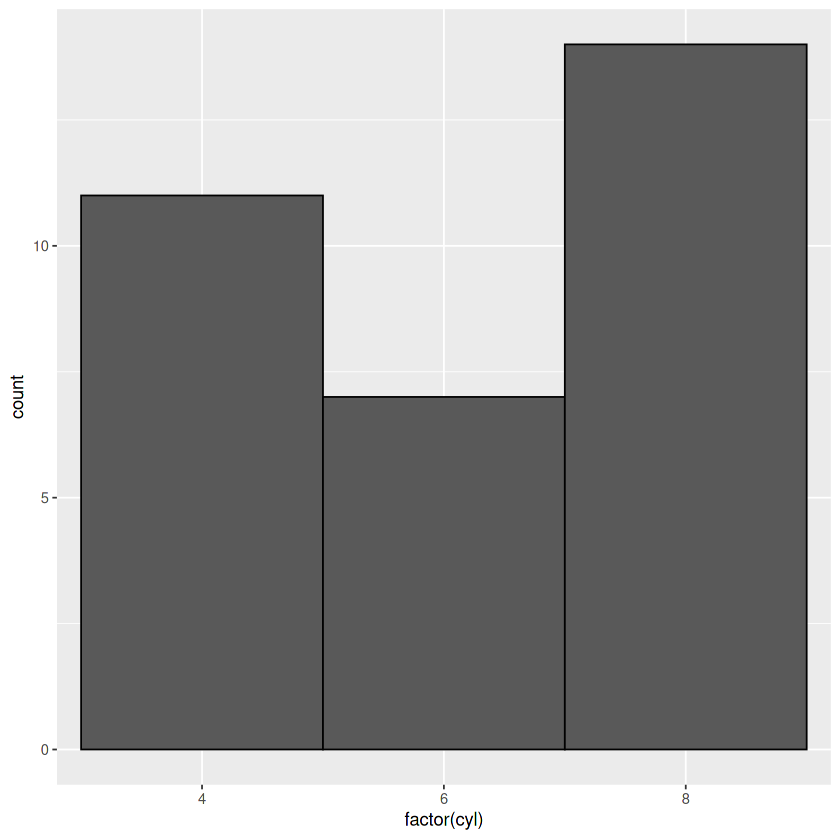

In [5]:
plot <- ggplot(mtcars, aes(x = factor(cyl))) +
  geom_bar(width = 1, color = "black")
plot

## Bivariat:

### Box-Plot

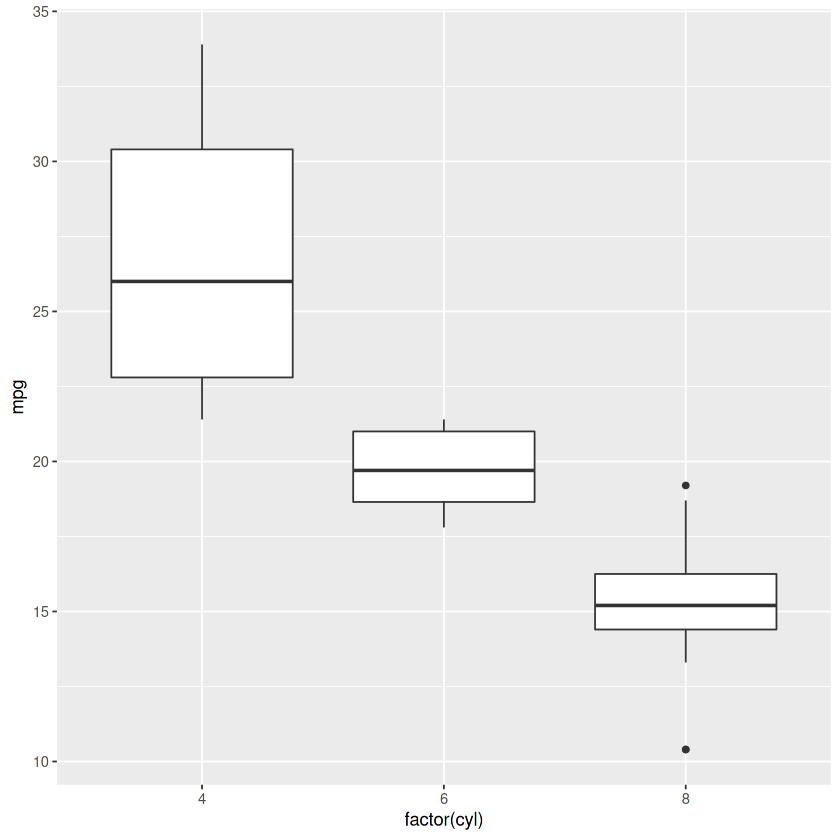

In [6]:
ggplot(data = mtcars) +
  geom_boxplot(aes(x = factor(cyl), y = mpg))

### Scatter-Plot

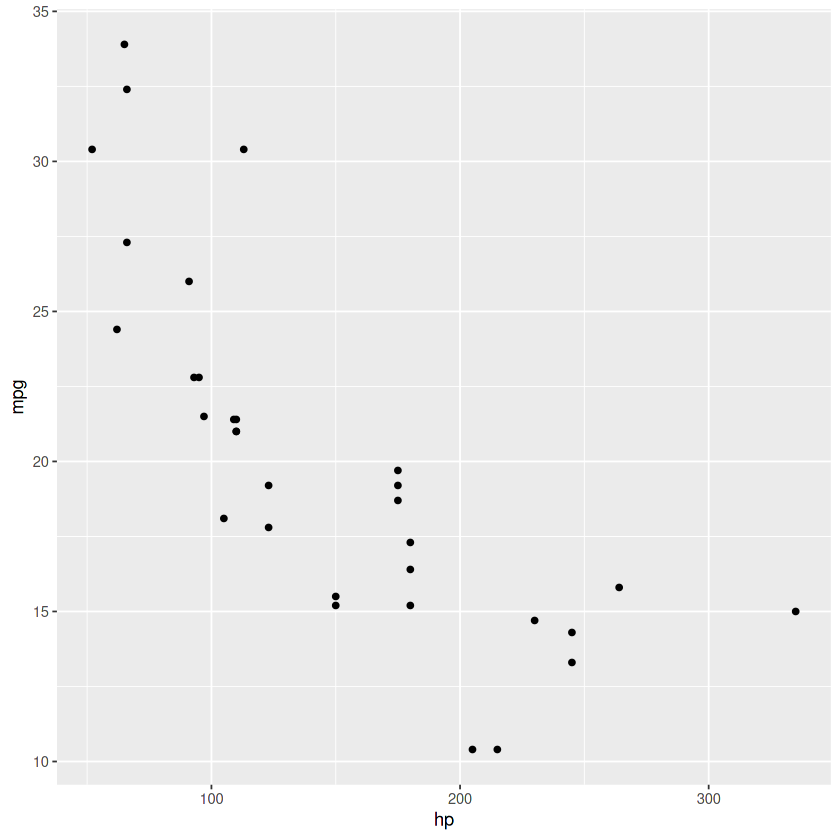

In [7]:
plot <- ggplot(data = mtcars) +
  geom_point(aes(x = hp, y = mpg))
plot

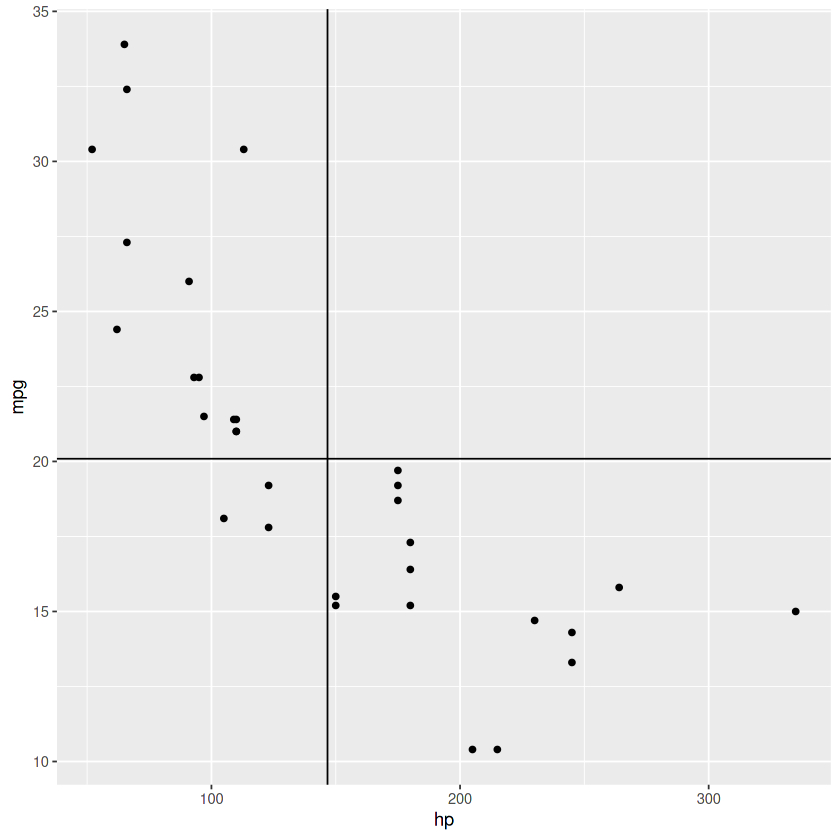

In [8]:
plot + 
  geom_hline(aes(yintercept = mean(mpg))) +
  geom_vline(aes(xintercept = mean(hp)))

### Regressions-Plot

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



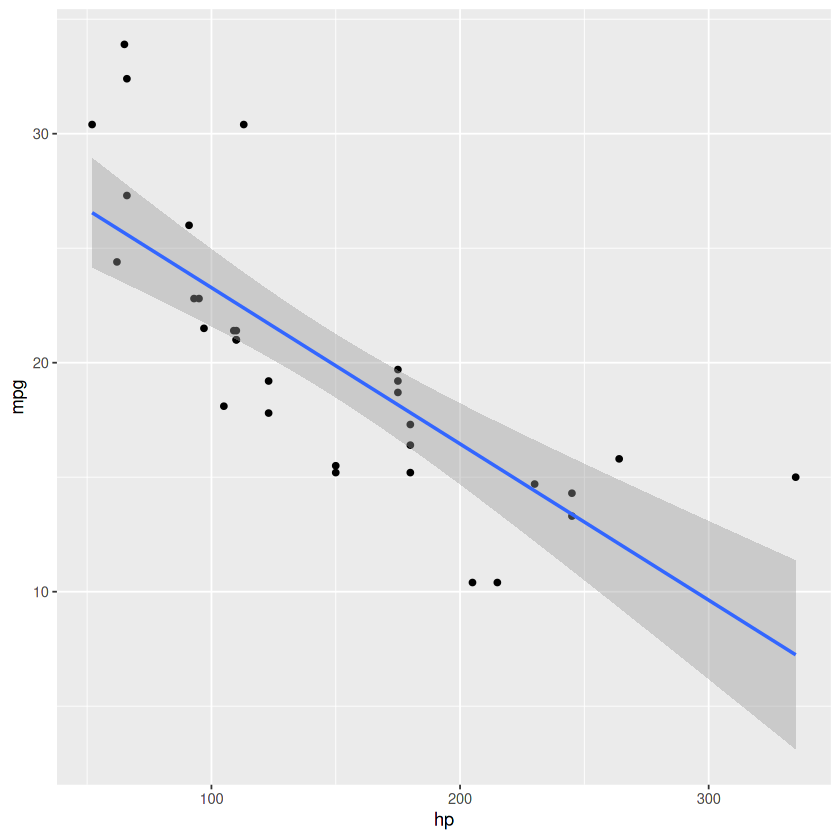

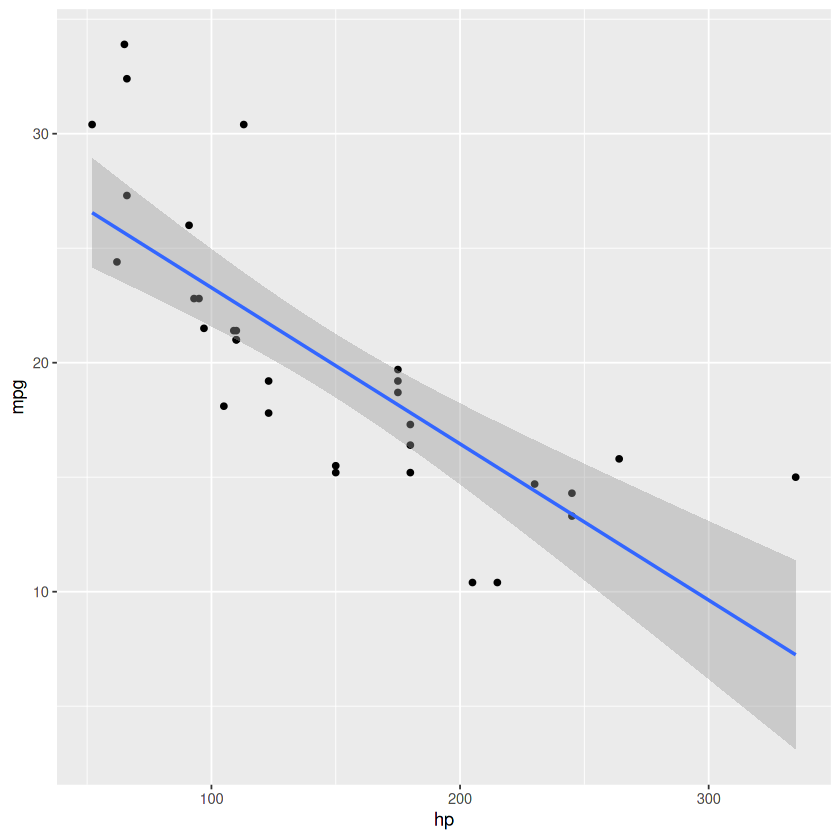

In [9]:
plot +
  geom_smooth(method = "lm", aes(x = hp, y = mpg))

plot +
  stat_smooth(method = "lm", aes(x = hp, y = mpg))

### Funktion

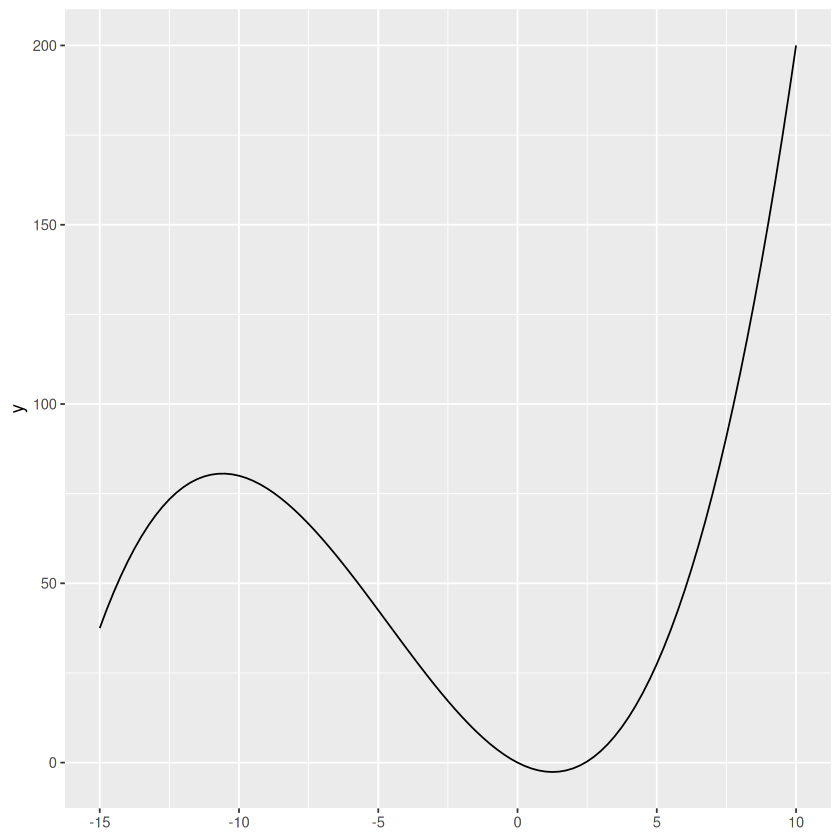

In [10]:
fun <- function(x) {0.1 * x^3 + 1.4 * x^2 - 4 * x}

ggplot() +
#  stat_function(fun = fun, xlim = range(-15, 10)) +
  geom_function(fun = fun, xlim = range(-15, 10))

### Zeitreihenplots

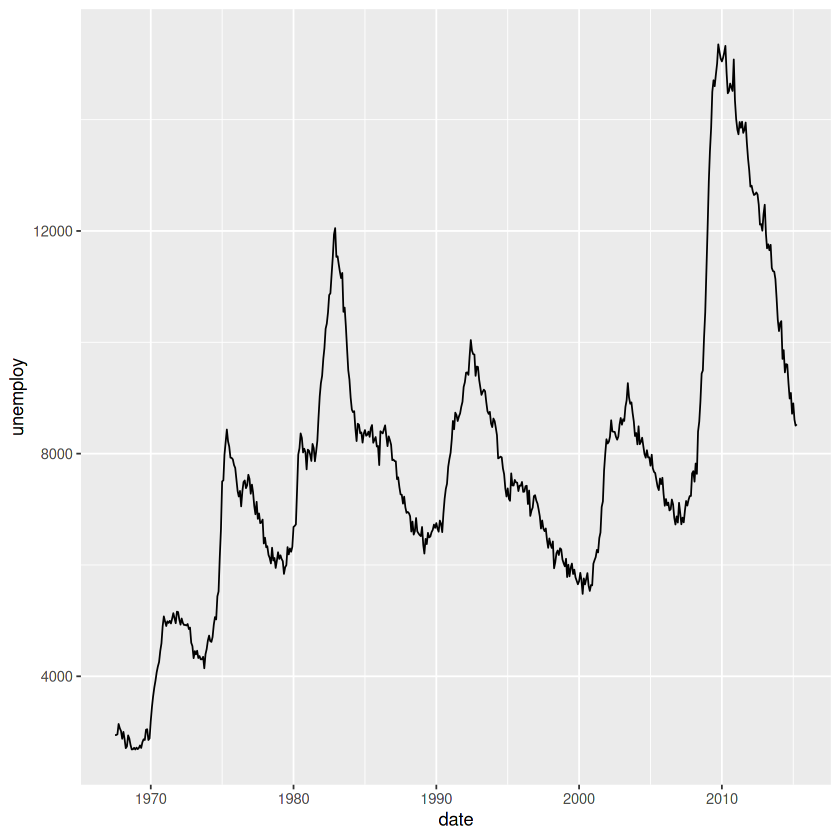

In [11]:
data("economics", package = "ggplot2")

plot <- ggplot(economics, aes(x = date, y = unemploy))
plot +
  geom_line()

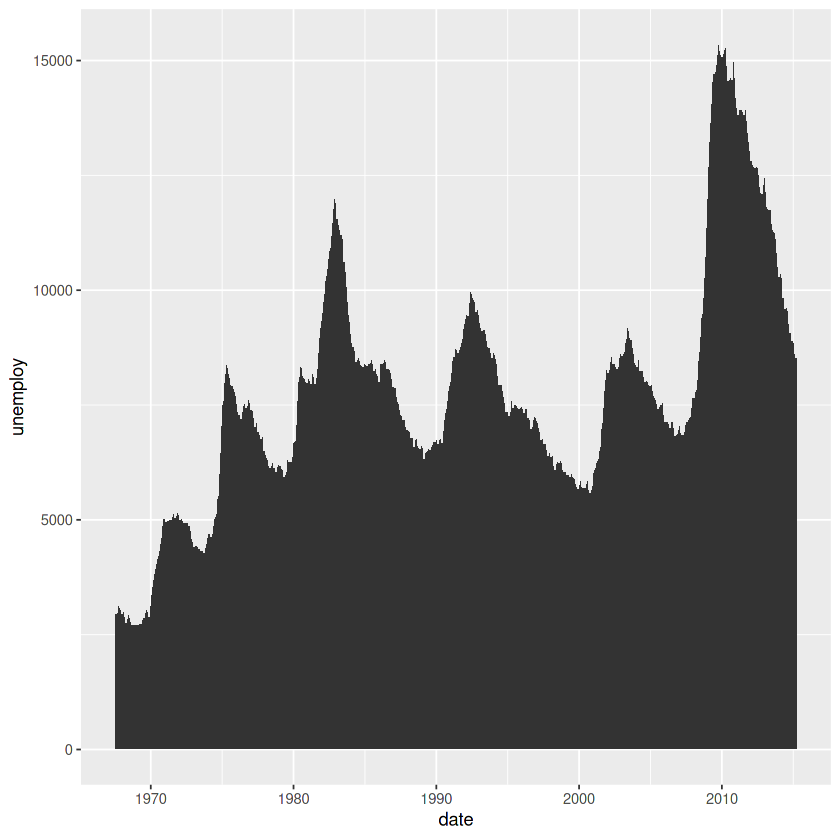

In [12]:
plot +
  geom_area()

## Sonstiges

### Maps

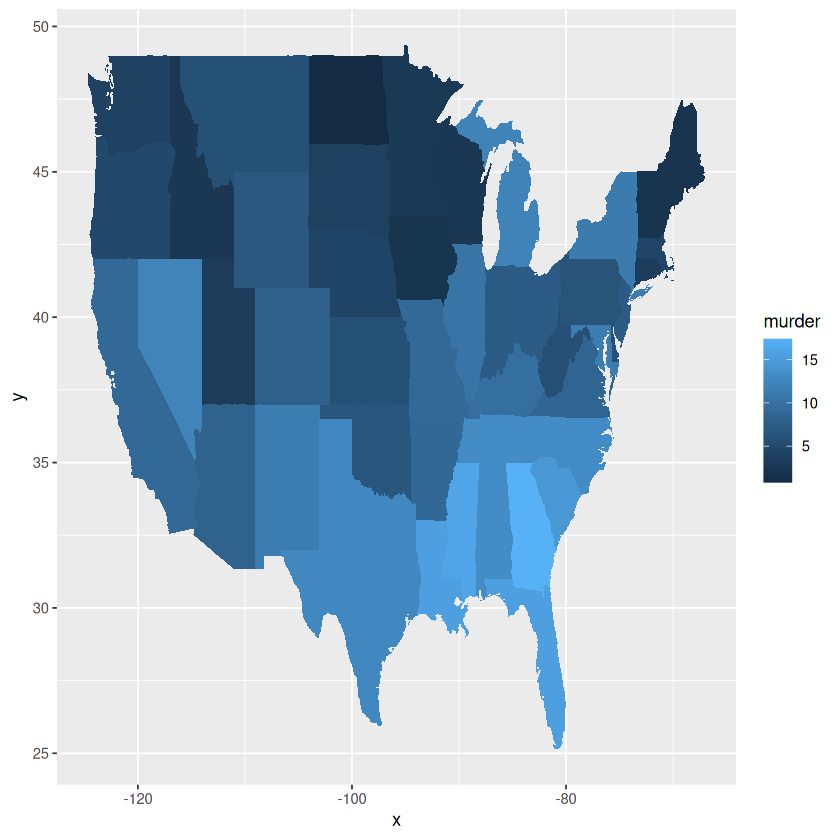

In [13]:
library(maps)
data("USArrests")
data <- data.frame(murder = USArrests$Murder, 
                   state = tolower(rownames(USArrests)) )
map <- map_data("state")
ggplot(data, aes(fill = murder)) +
  geom_map(aes(map_id = state), map = map) +
  expand_limits(x = map$long, y = map$lat)

# Koordinatensystem: coords und scale

## coords

### Normal

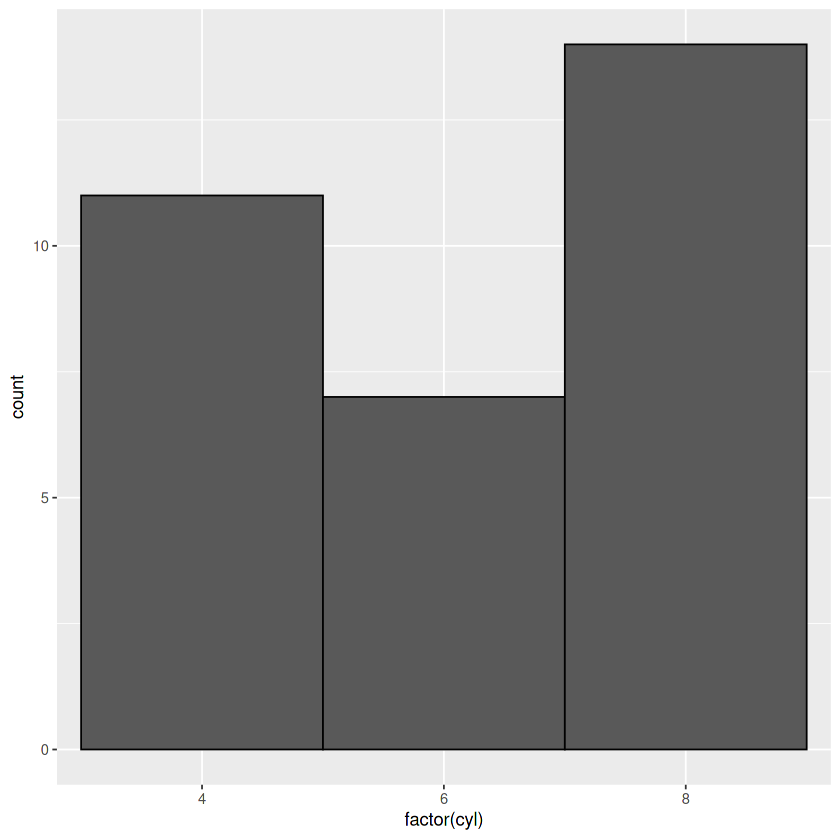

In [14]:
plot <- ggplot(mtcars, aes( x = factor(cyl))) +
  geom_bar(width = 1, color = "black")
plot

### Flip

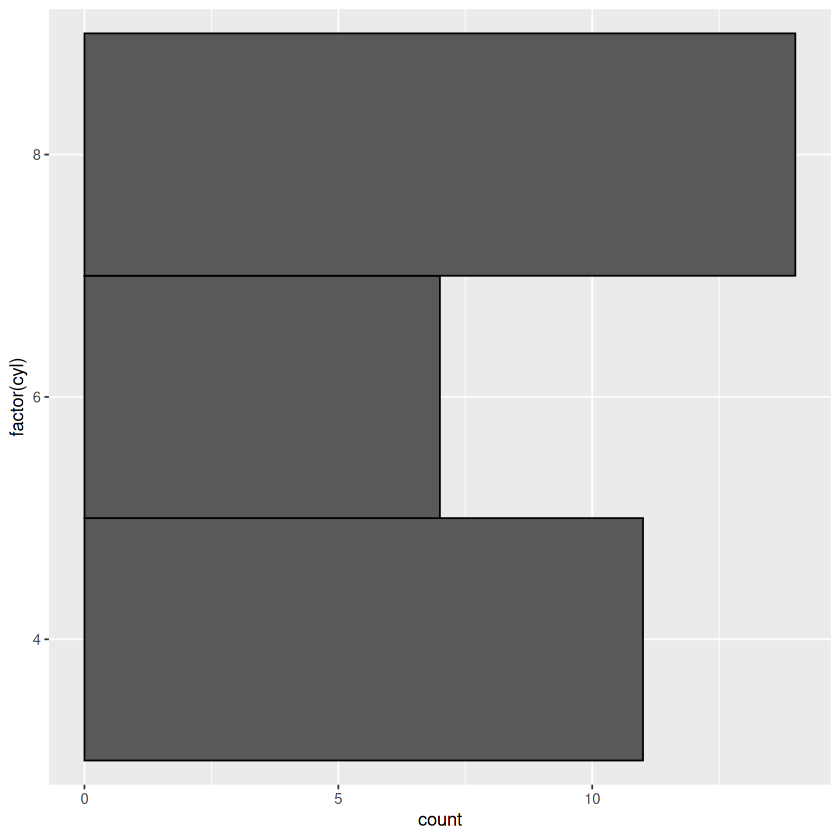

In [15]:
plot +
  coord_flip()

### Polar

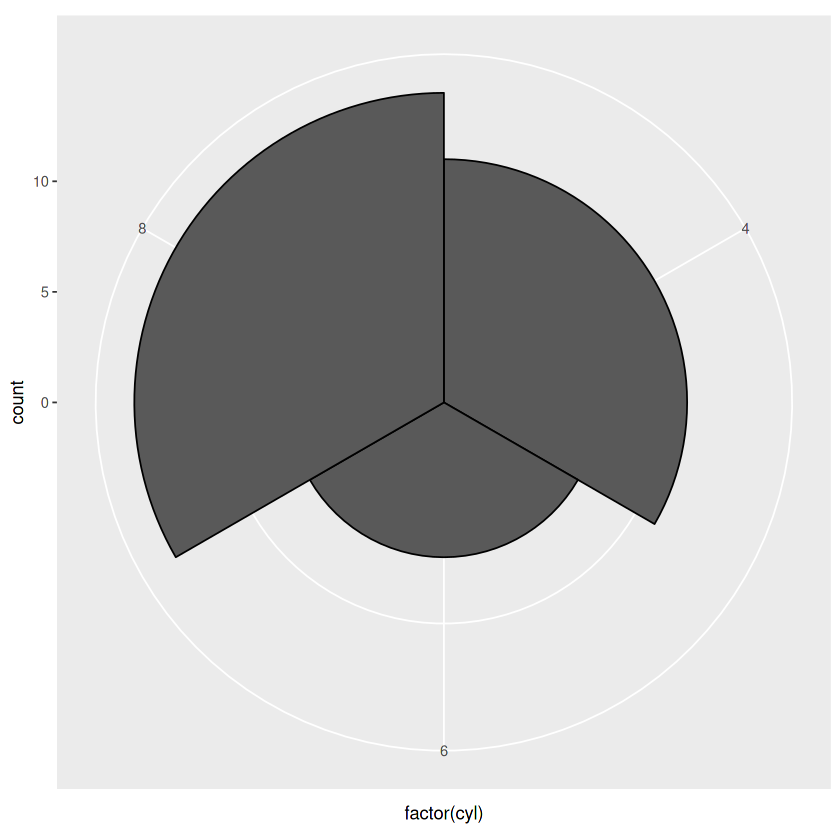

In [16]:
plot +
  coord_polar()

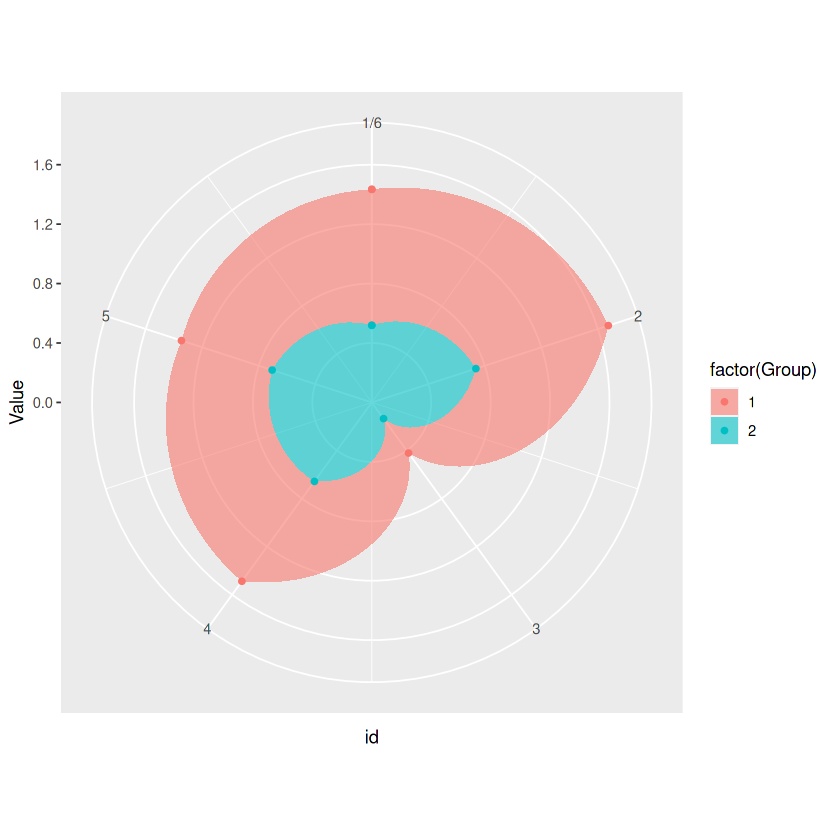

In [17]:
set.seed(42)
data <- data.frame(Obs1 = runif(5, 0, 1), 
                   Obs2 = runif(5, 0, 1))

data <- rbind(data, data[1, ])

data.long <- reshape(data, 
                     varying = c("Obs1", "Obs2"), 
                     v.names = c("Value"),
                     #idvar = "id",
                     direction = "long",
                     timevar = "Group")


plot <- ggplot(data.long) +
  geom_area(aes(x = id, y = Value, fill = factor(Group)), alpha = 0.6) +
  geom_point(aes(x = id, y = Value, color = factor(Group)), position = "stack") +
  coord_polar(theta = "x")
plot

## scale

-   ggplot unterscheidet i.d.R. selbständig zwischen diskreter und stetiger Skalierung, dies kann dennoch auch vorgegeben werden

-   interessanter an dieser Stelle: Skalierung erlaubt Beeinflussung von Darstellungsbereich, "Breaks", Achsen-Skalierung, etc.

### Achsenskalierung

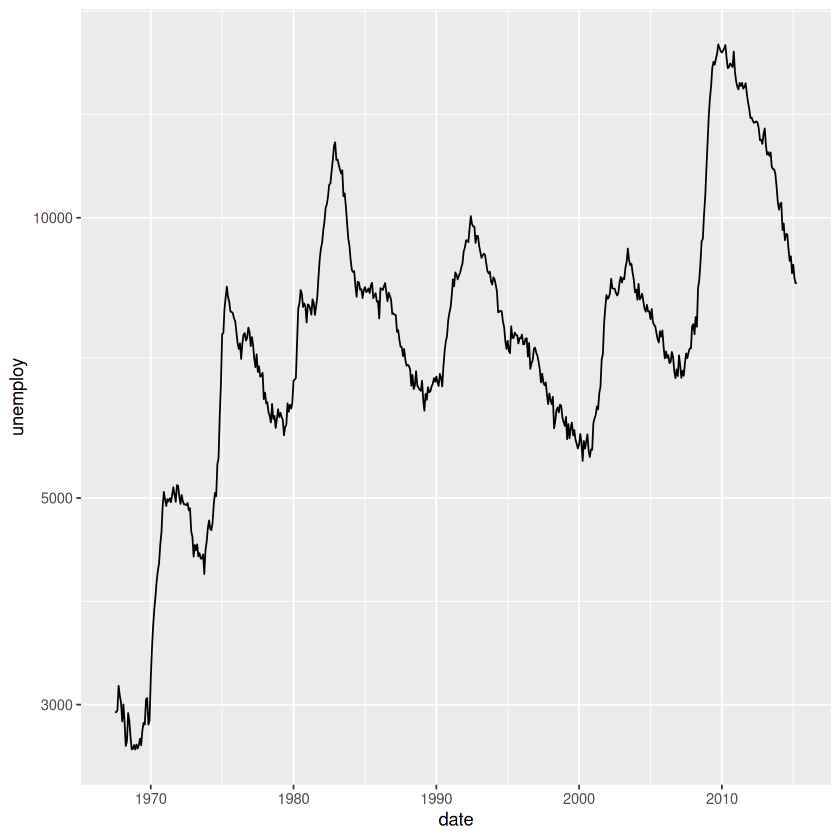

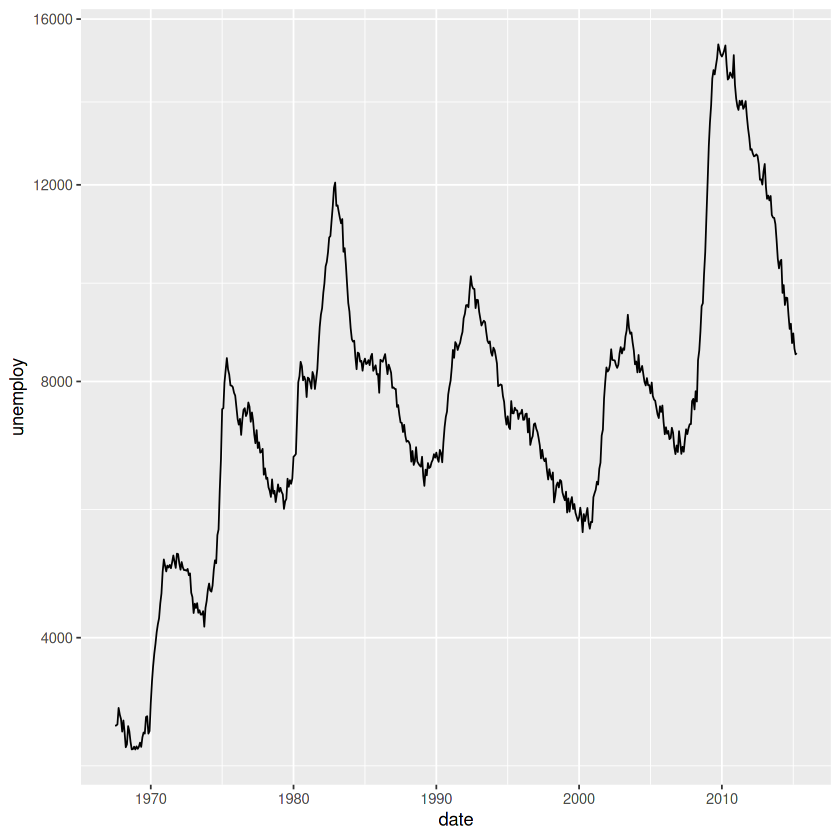

In [18]:
data("economics", package = "ggplot2")

plot <- ggplot(economics, aes(x = date, y = unemploy)) +
  geom_line()

plot +
  scale_y_log10()

plot +
  scale_y_sqrt()

Hier sieht man wie sich einfach durch addition der entsprechenden `scale_*` Funktion ein z.B. logarythmisches oder Wurzel-Skalenniveau auf der Y-Achse umsätzen lässt.

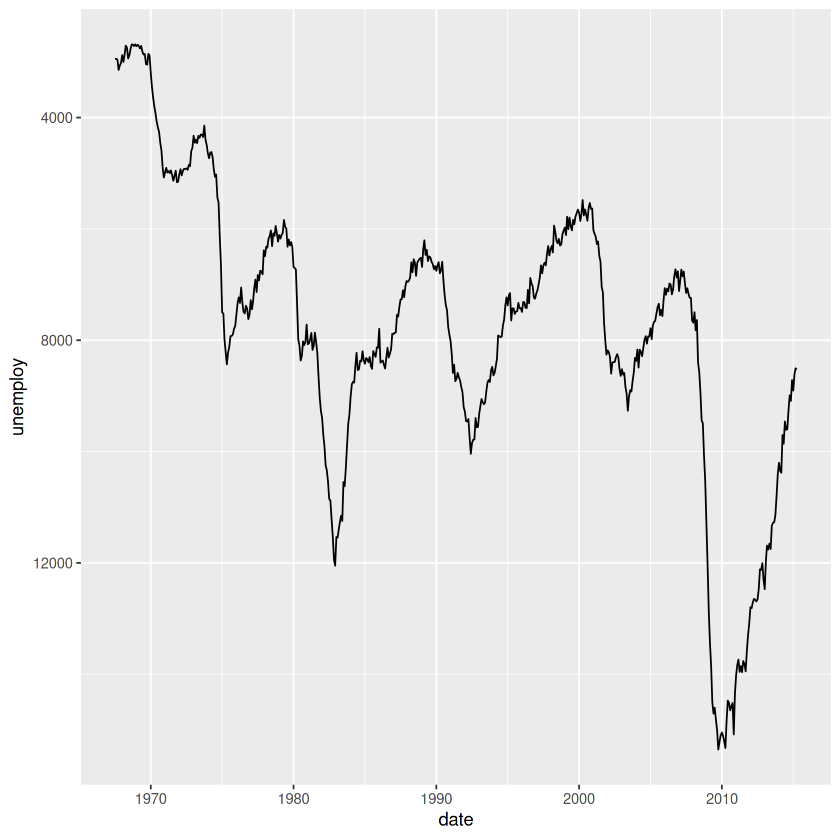

In [19]:
plot +
  scale_y_reverse()

### Darstellungsbereich

Warning message:
“Removed 453 row(s) containing missing values (geom_path).”


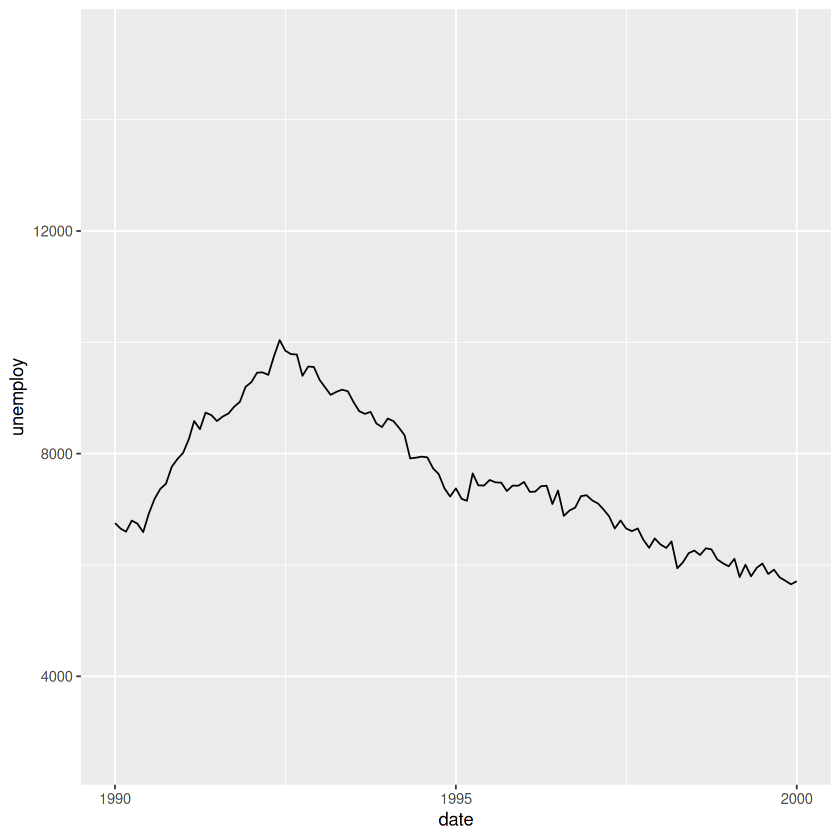

In [20]:
data("economics", package = "ggplot2")

plot <- ggplot(economics, aes(x = date, y = unemploy)) +
  geom_line()

plot +
  scale_x_date(limits = as.Date(c("1990-01-01", "2000-01-01")))

### Breaks

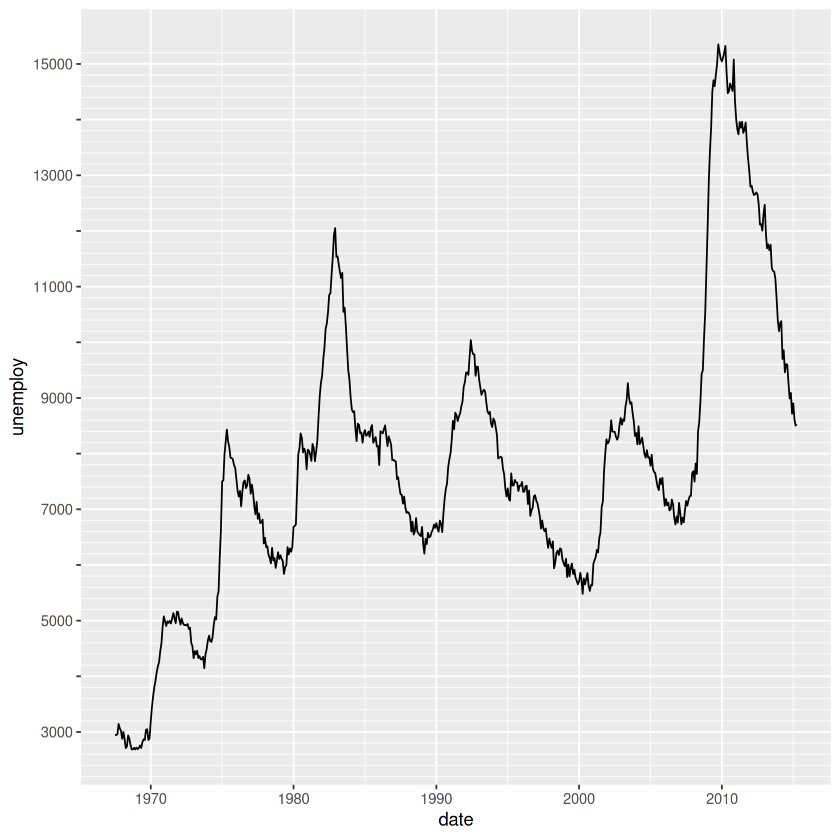

In [21]:
plot +
  scale_y_continuous(
    breaks = seq(from = 0, to = max(economics$unemploy), by = 1000), 
    minor_breaks = seq(from = 0, to = max(economics$unemploy), by = 200),
    labels = function(x) ifelse(x %% 2000 == 1000, as.character(x), ""))

### labels

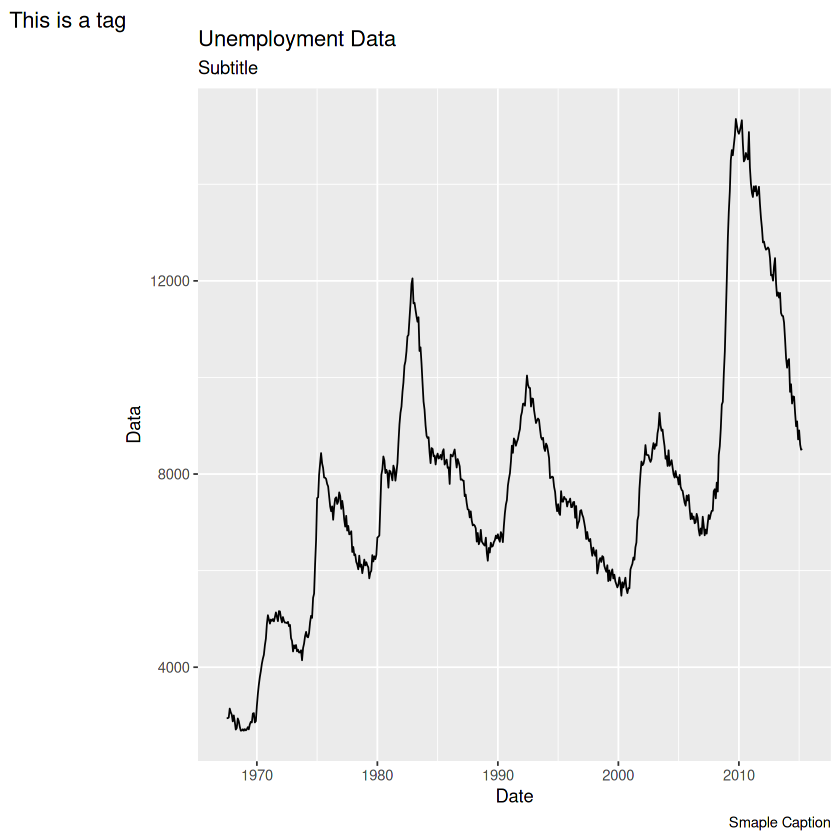

In [22]:
data("economics", package = "ggplot2")

ggplot(economics, aes(x = date, y = unemploy)) +
  geom_line() +
  labs(title = "Unemployment Data", subtitle = "Subtitle", caption = "Smaple Caption", tag = "This is a tag", x = "Date", y = "Data")

# Farben: color und groups

## Einfache Farben

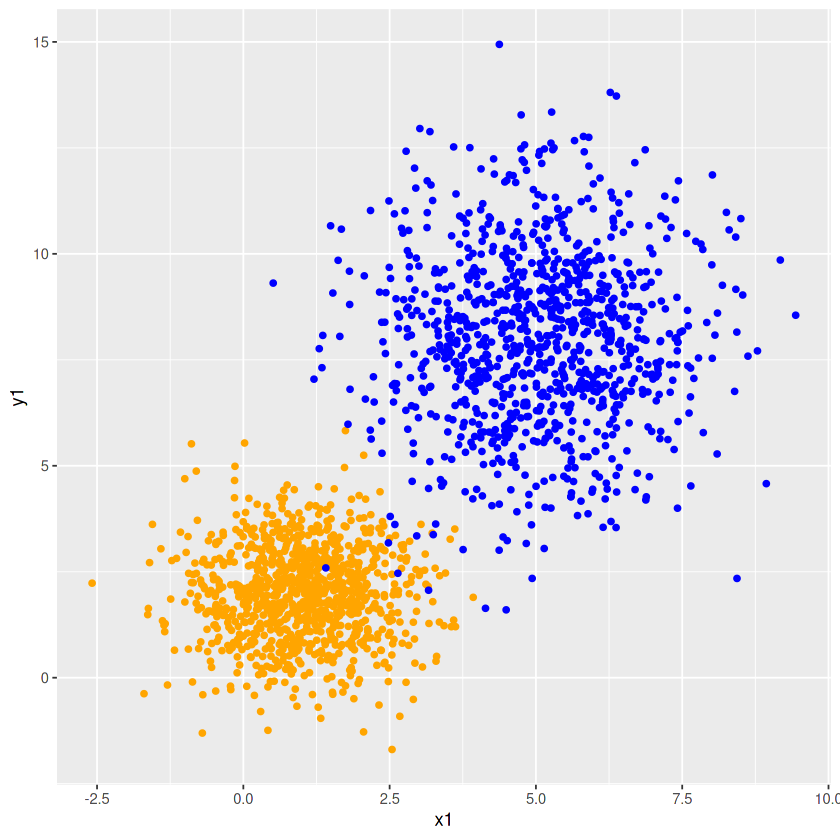

In [23]:
library(MASS)
n <- 1000
sigma1 <- matrix(c(1, 0, 0, 1.2), byrow = TRUE, nrow = 2)
sigma2 <- matrix(c(2, 0, 0, 4), byrow = TRUE, nrow = 2)
u1 <- mvrnorm(n = n, mu <- c(1, 2), Sigma = sigma1)
u2 <-  mvrnorm(n = n, mu <- c(5, 8), Sigma = sigma2)


data <- data.frame(x1 = u1[, 1], y1 = u1[, 2], x2 = u2[, 1], y2 = u2[, 2])

plot <- ggplot(data = data) +
  geom_point(aes(x = x1, y = y1), color = "orange") +
  geom_point(aes(x = x2, y = y2), color = "blue")

plot

Einfache Umsetzung von Farben in einer Grafik. Hier müssen für jedes Dataset das Attribut "color" konstant auf einen Wert gesetzt werden. Für aufwändige Grafiken empfiehlt es sich das Attribut "color" datengetrieben zu befühlen.

## Benutzung von fill, color und group

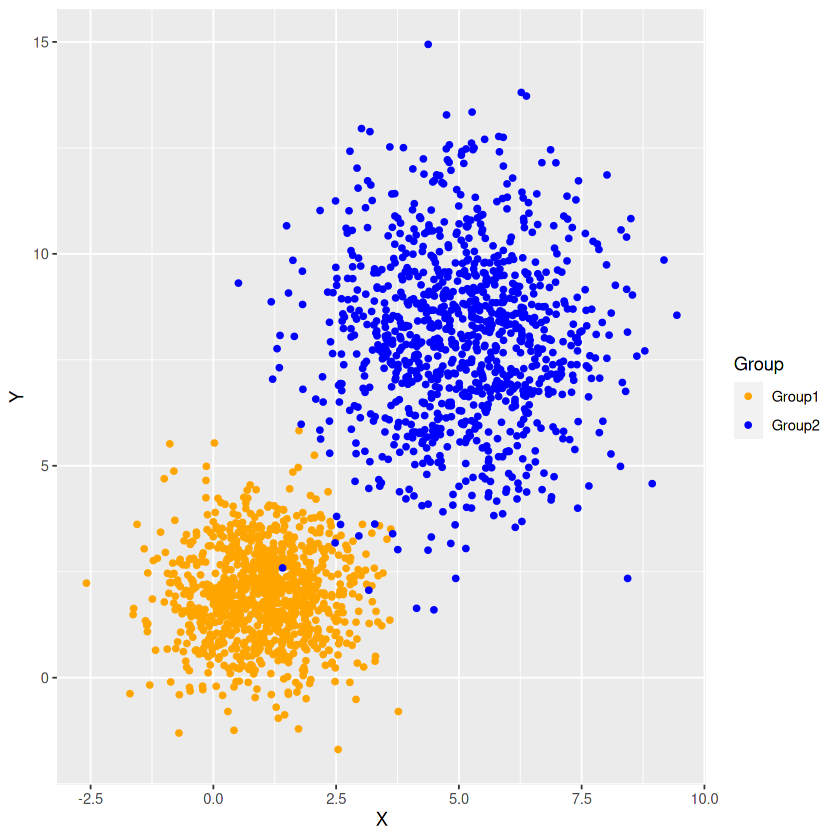

In [38]:
data <- data.frame(rbind(cbind("Group1", u1), cbind("Group2", u2)))
names(data) <- c("Group", "X", "Y")
data$Group %<>% factor
data$X %<>% as.numeric
data$Y %<>% as.numeric

plot <- ggplot(data = data) +
  geom_point(aes(x = X, y = Y, colour = Group)) +
  scale_color_manual(values = c("Group1" = "orange", "Group2" = "blue"))
plot

Hier wurde die Datentabelle um eine Variable `Gruppe` ergänzt, welche den entsprechenen Datensatz einer Gruppe zuordnet. Das `color` Attribut wird hier nun innerhalb der `aes` Funktion zugewiesen. Anstatt die Farbe konstant für einen Datensatz zu setzen, kann ggplot nun Automatische die Gruppenzugehörigkeit bestimmen. Den Gruppen werden dann automatisch Farben zugewiesen (i.d.R. rot und blau). Die Farbzuweisung kann nun über eine anpassung der "Farbskala" umgesetzt werden, dabei wird jeder spezifische Gruppenwert auf einen Farbwert gemappt.

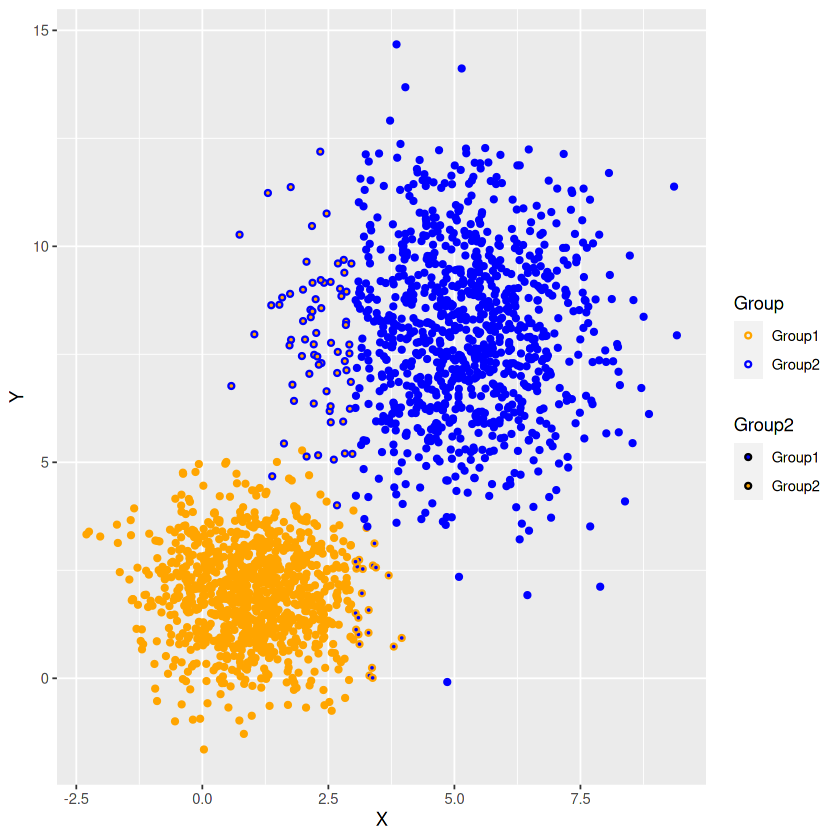

In [25]:
data$Group2 <- factor(ifelse(data$X > mean(data$X), "Group1", "Group2"))

plot <- ggplot(data = data) +
  geom_point(aes(x = X, y = Y, fill = Group2, color = Group), shape = 21, stroke = 1, size = 1) +
  scale_color_manual(values = c("Group1" = "orange", "Group2" = "blue")) +
  scale_fill_manual(values = c("Group1" = "blue", "Group2" = "orange"))
plot

Hier sieht man ein Beispiel, wie sich mehrere Gruppen dazu nutzen lassen mehrere Attribute (hier Füllfarbe und Linienfarbe) datengetrieben zu beeinflussen.

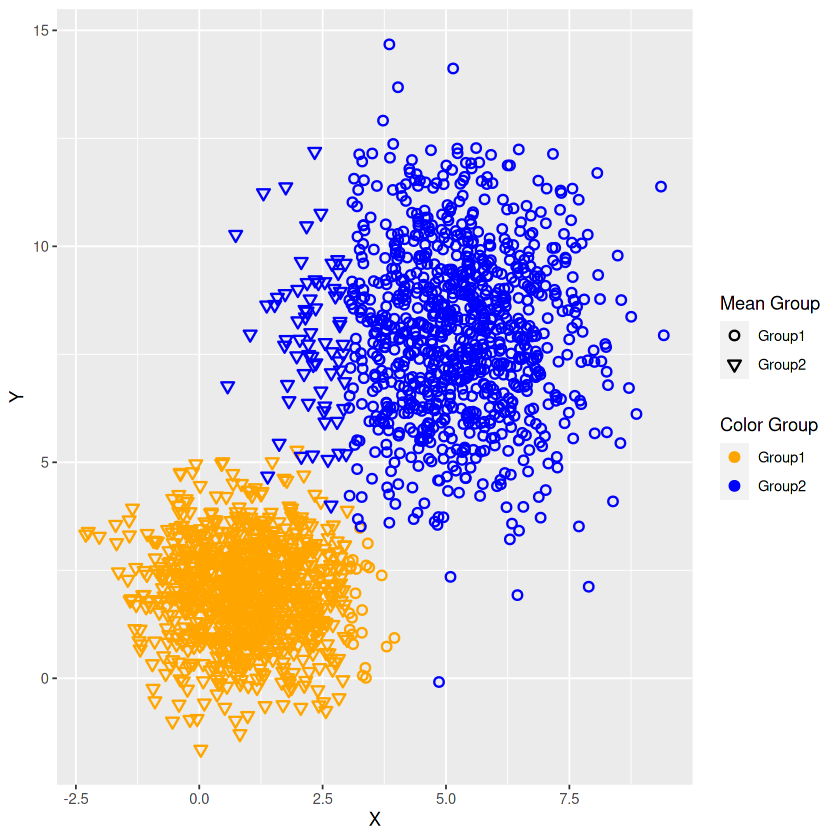

In [26]:
plot <- ggplot(data = data, aes(x = X, y = Y, shape = Group2, color = Group)) +
  geom_point(stroke = 1, size = 2) +
  scale_color_manual(name = "Color Group", 
                     values = c("Group1" = "orange", "Group2" = "blue")) +
  scale_shape_manual(name = "Mean Group", 
                     values = c("Group1" = 1, "Group2" = 6))
plot

## Einschub: Long VS Wide Datenstrucktur

In [27]:
library(MASS)
library(magrittr)
n <- 1000
sigma1 <- matrix(c(1, 0, 0, 1.2), byrow = TRUE, nrow = 2)
sigma2 <- matrix(c(2, 0, 0, 4), byrow = TRUE, nrow = 2)
u1 <- mvrnorm(n = n, mu <- c(1, 2), Sigma = sigma1)
u2 <-  mvrnorm(n = n, mu <- c(5, 8), Sigma = sigma2)


data.wide <- data.frame(x1 = u1[, 1], y1 = u1[, 2], x2 = u2[, 1], y2 = u2[, 2])

data.long <- data.frame(rbind(cbind("Group1", u1), cbind("Group2", u2)))
names(data.long) <- c("Group", "X", "Y")
data.long$Group %<>% factor
data.long$X %<>% as.numeric
data.long$Y %<>% as.numeric

head(data.wide)

head(data.long)

,x1,y1,x2,y2
,<dbl>,<dbl>,<dbl>,<dbl>
1,1.0686730,2.5412202,4.918904,4.754705
2,1.8683799,1.1307070,5.539672,9.543569
3,1.6681429,1.3972054,5.895461,5.424052
4,0.8305874,1.5855747,5.096043,9.783152
5,0.9274891,0.3971396,2.281982,7.644333
6,3.1983661,3.1463799,4.674925,11.408809


,Group,X,Y
,<fct>,<dbl>,<dbl>
1,Group1,1.0686730,2.5412202
2,Group1,1.8683799,1.1307070
3,Group1,1.6681429,1.3972054
4,Group1,0.8305874,1.5855747
5,Group1,0.9274891,0.3971396
6,Group1,3.1983661,3.1463799


-   ggplot arbeitet besser mit long-Datenstrukturen

-   arbeiten mit der intuitiven wide Struktur ebenfalls möglich, jedoch kann dies häufig wesentlich aufwändiger sein, da bei dem fill-Attribut dann für jede Gruppe eine eigene Zeile verwendet werden muss

-   dank einigen automatisierten Funktionen lassen sich wide-Struckturen relativ unaufwändig in long-Struckturen überführen

In [28]:
n <- 100
sigma1 <- matrix(c(1, 0, 0, 1.2), byrow = TRUE, nrow = 2)
sigma2 <- matrix(c(2, 0, 0, 4), byrow = TRUE, nrow = 2)
u1 <- mvrnorm(n = n, mu <- c(1, 2), Sigma = sigma1)
u2 <-  mvrnorm(n = n, mu <- c(5, 8), Sigma = sigma2)


data.wide <- data.frame(x1 = u1[, 1], y1 = u1[, 2], x2 = u2[, 1], y2 = u2[, 2])

library(reshape2)

data.wide$id <- 1:nrow(data.wide)

data.long <- reshape(data.wide, 
                     varying = c("x1", "y1", "x2", "y2"), 
                     v.names = c("x", "y"),
                     #idvar = "id",
                     direction = "long",
                     timevar = "Group")

# Eyecandy: Themes

## Allgemeine Darstellungsweise

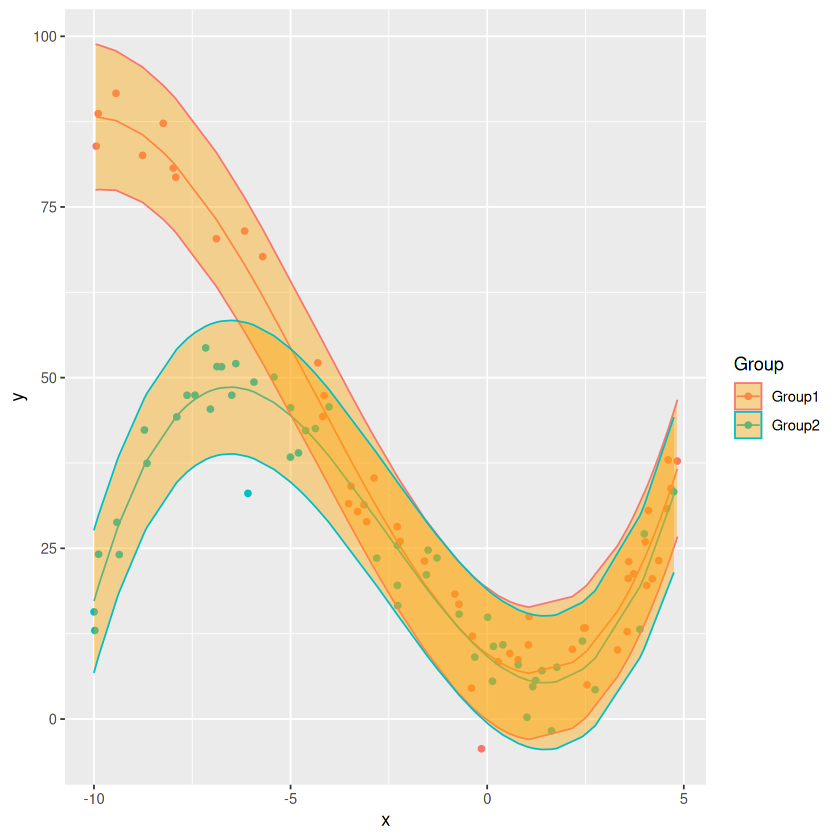

In [29]:
set.seed(42)
x1 <- runif(n = 50, -10, 5)
x2 <- runif(n = 50, -10, 5)

u <- rnorm(n = 50, mean = 0, sd = 5)

y1 <- 10 + 0.1 * x1^3 + 1.4 * x1^2 - 4 * x1 + u
y2 <- 8 + 0.17 * x2^3 + 1.31 * x2^2 - 4.9 * x2 + u

data1 <- data.frame(Group = "Group1", y = y1, x = x1)
data2 <- data.frame(Group = "Group2", y = y2, x = x2)

lm1 <- lm(y ~ poly(x, degree = 3), data = data1)
lm2 <- lm(y ~ poly(x, degree = 3), data = data2)
data <- rbind(cbind(data1, predict(lm1, data1, interval="predict")),
              cbind(data2, predict(lm2, data2, interval="predict")))

plot <- ggplot(data, aes(color = Group)) +
  geom_point(aes(x = x, y = y)) +
  geom_line(aes(x = x, y = fit)) +
  geom_ribbon(aes(x = x, ymin = lwr, ymax = upr), fill = "orange", alpha = 0.4)
plot

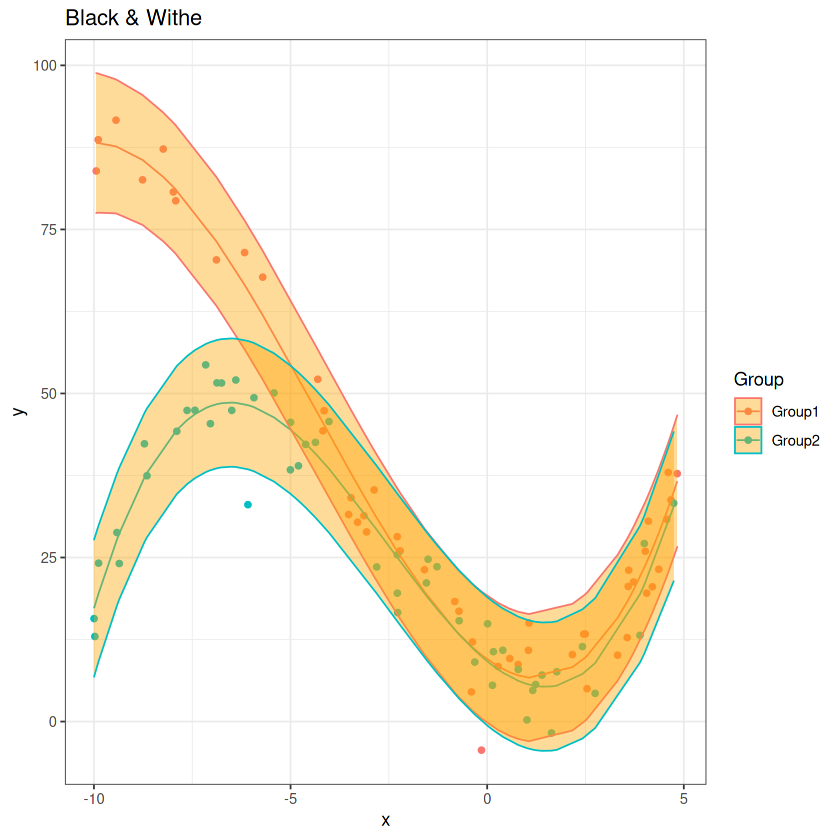

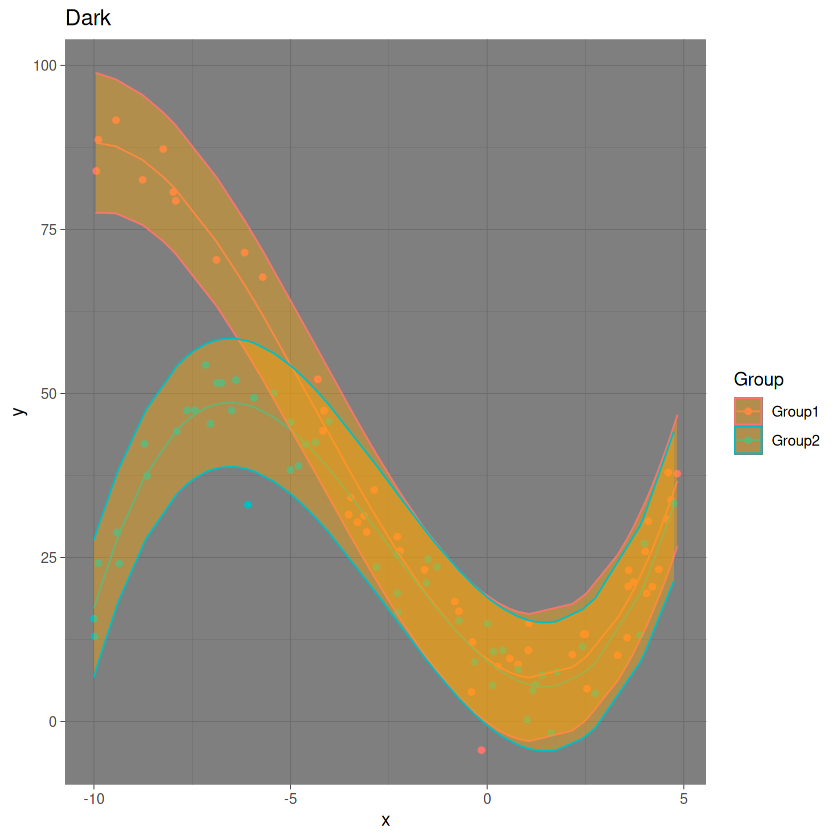

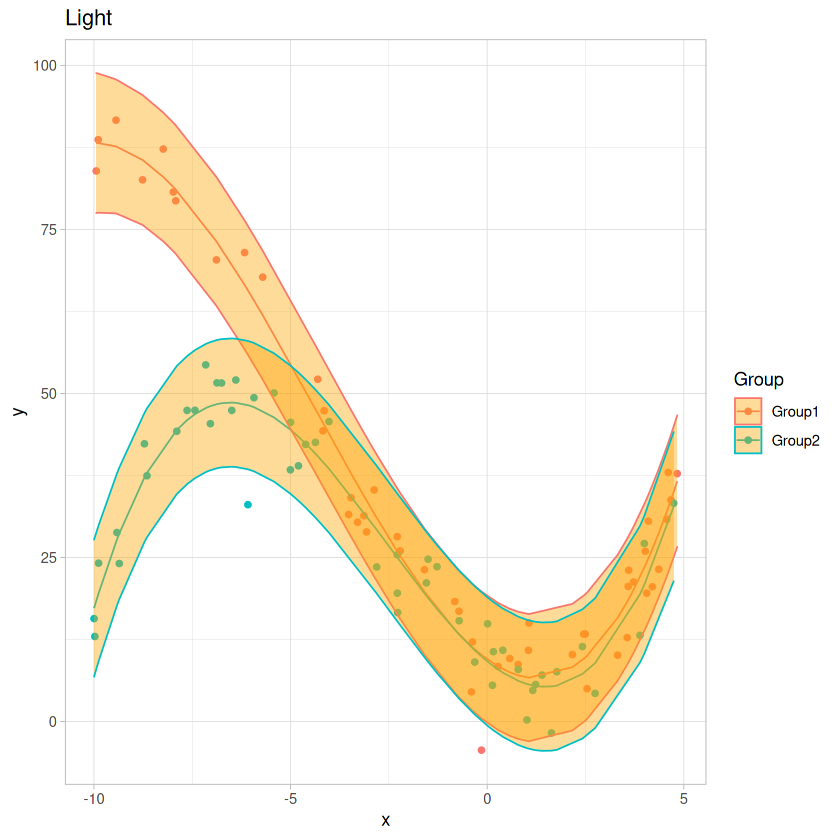

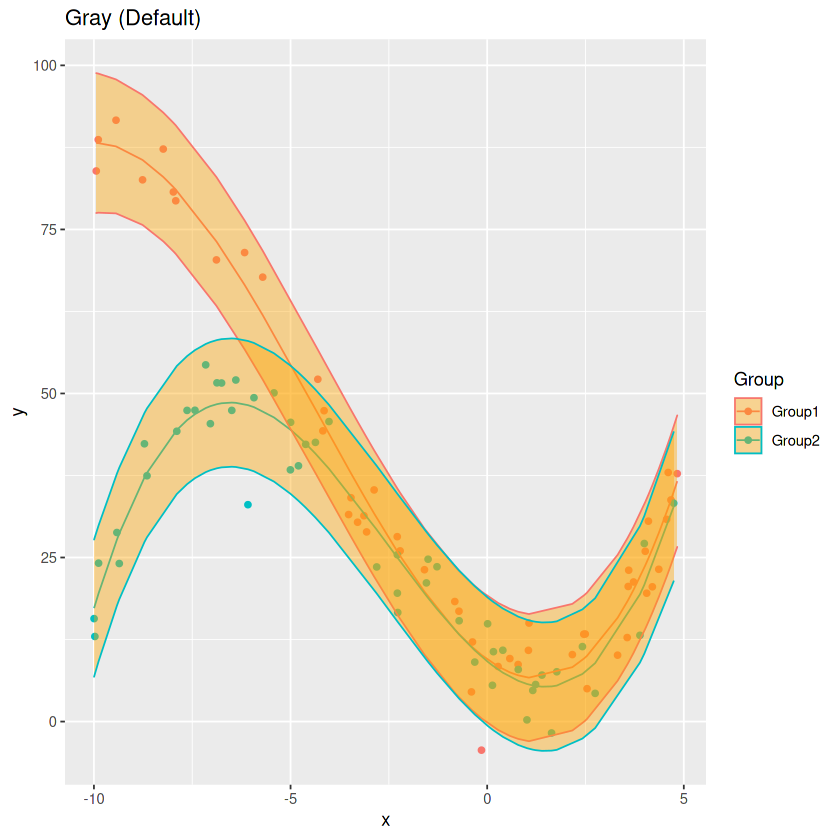

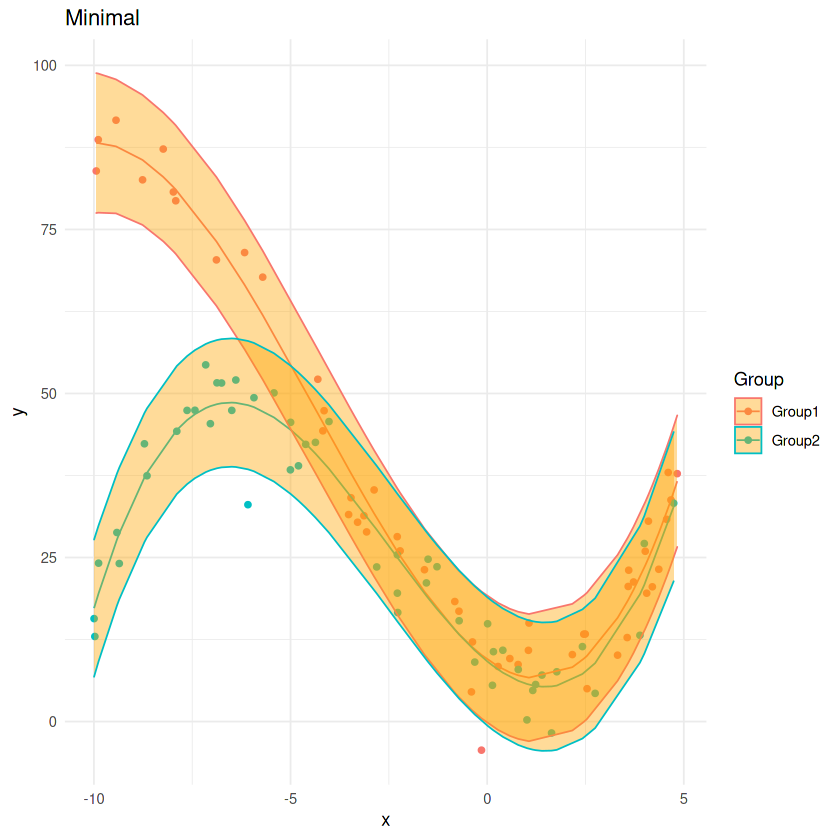

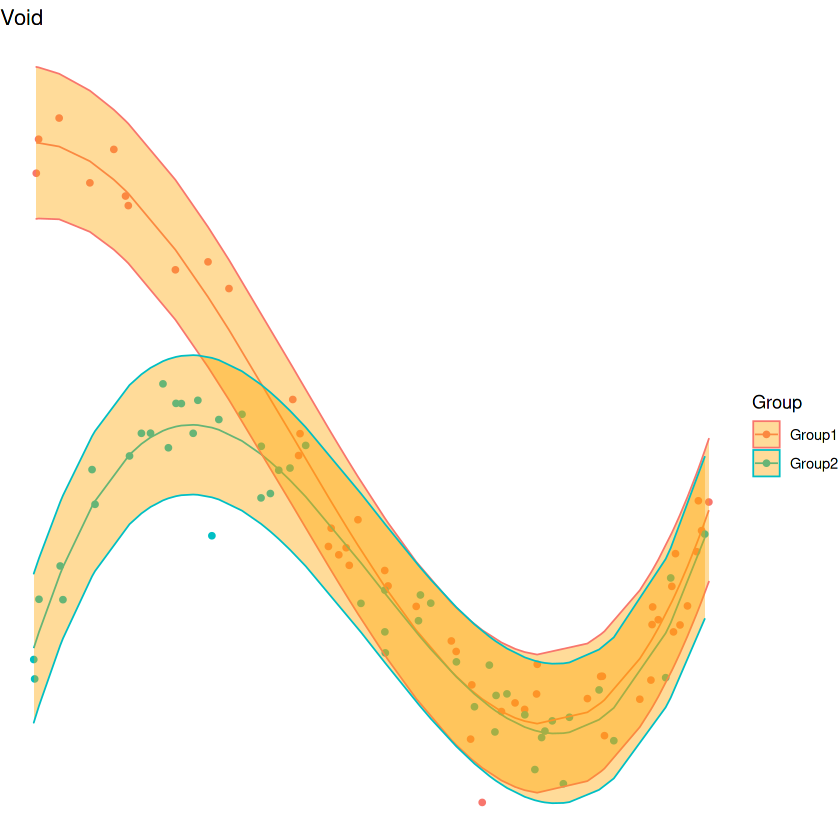

In [30]:
plot +
  labs(title = "Black & Withe") +
  theme_bw()

plot +
  labs(title = "Dark") +
  theme_dark()

plot +
  labs(title = "Light") +
  theme_light()

plot +
  labs(title = "Gray (Default)") +
  theme_gray()

plot +
  labs(title = "Minimal") +
  theme_minimal()

plot +
  labs(title = "Void") +
  theme_void()

Mit den vorgefertigten Themes lässt sich schnell das Aussehend er Grafik an die eigenen Wünsche anpassen. Es lassen sich aber auch noch viele weitere, sehr viel detailliertere änderungen an dem Aussehend er Grafik tätigen.

## Weitere Optionen

### Legende

Im Allgemeinen wird die Legende automatisch von ggplot erstellt, wenn eine Variable auf aesthetics wie `group` `color`, `fill` etc. gemapped wird. Hier soll stattdessen veranschaulicht werden wie sich die Legende (als Beispiel für ein Grafikelement) sehr tiefgreifend an die eigenen Bedürfnisse anpassen lässt.

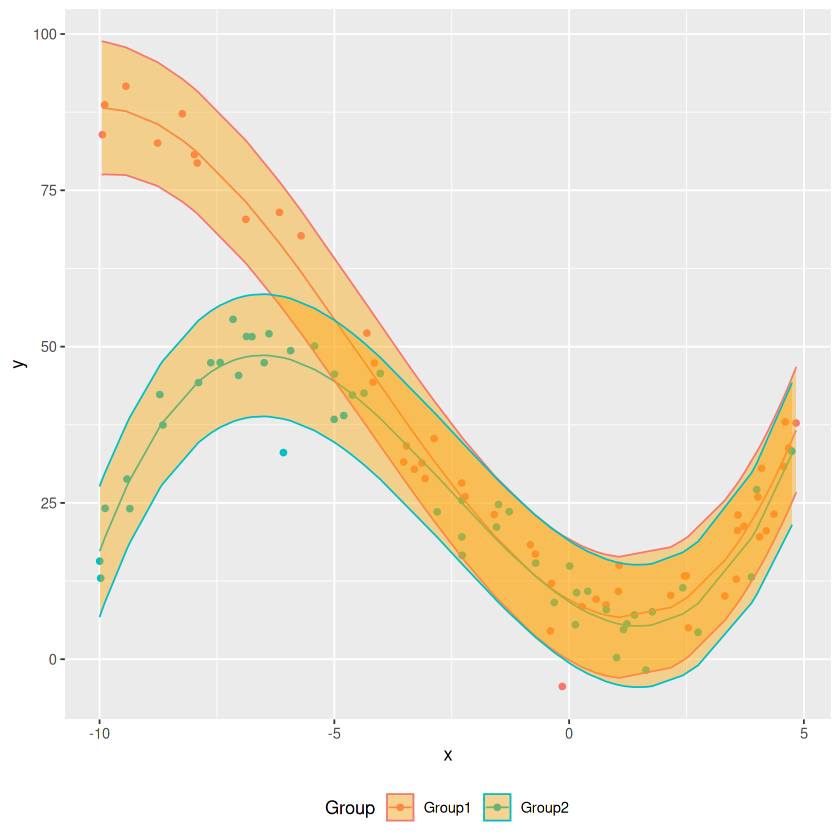

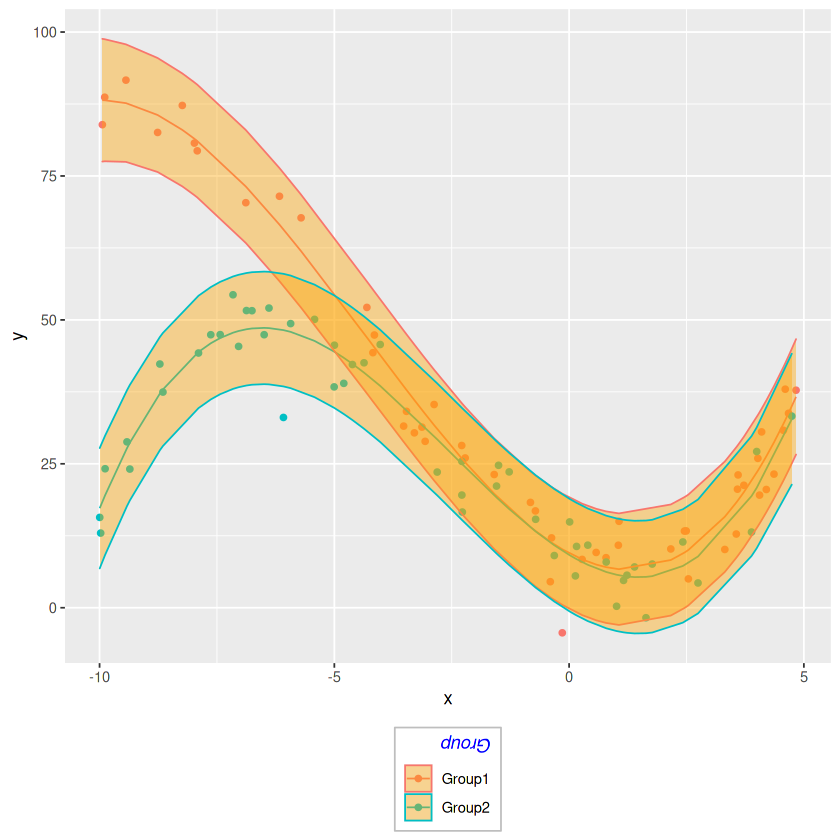

In [31]:
plot +
  theme(legend.position = "bottom")

plot +
  theme(legend.position = "bottom", 
        legend.title = element_text(color = "blue", angle = 180, face = "italic"),
        legend.direction = "vertical",
        legend.background = element_rect(colour = "grey"))

Durch die Anpassung verschiedener Attribute der `theme` Layer, können alle dargestellten Elemente verändert werden, dazu gehört auch die Legende, hier als Beispiel eine Veränderung der Position sowie verschiedene Formatierungen von Elementen der Legende.

# Fortgeschritten

## Faceting

Feceting erlaubt das Automatische Plotten mehrerer, getrennter Grafiken, differenziert bei einer Faktor-Variable.

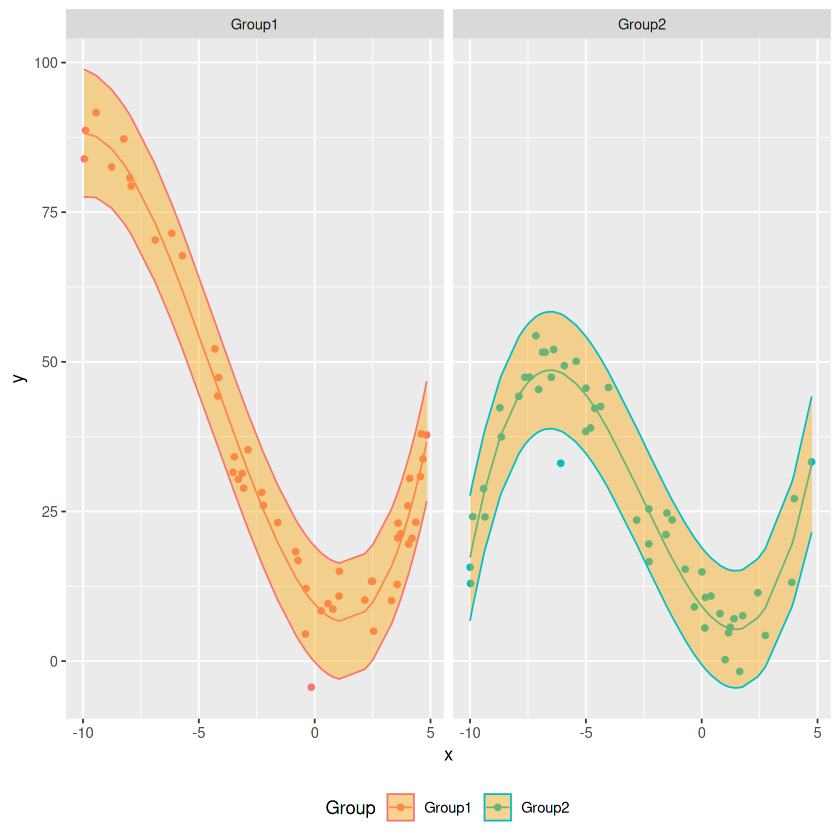

In [32]:
set.seed(42)
x1 <- runif(n = 50, -10, 5)
x2 <- runif(n = 50, -10, 5)

u <- rnorm(n = 50, mean = 0, sd = 5)

y1 <- 10 + 0.1 * x1^3 + 1.4 * x1^2 - 4 * x1 + u
y2 <- 8 + 0.17 * x2^3 + 1.31 * x2^2 - 4.9 * x2 + u

data1 <- data.frame(Group = "Group1", y = y1, x = x1)
data2 <- data.frame(Group = "Group2", y = y2, x = x2)

lm1 <- lm(y ~ poly(x, degree = 3), data = data1)
lm2 <- lm(y ~ poly(x, degree = 3), data = data2)
data <- rbind(cbind(data1, predict(lm1, data1, interval="predict")),
              cbind(data2, predict(lm2, data2, interval="predict")))

plot <- ggplot(data, aes(color = Group)) +
  geom_point(aes(x = x, y = y)) +
  geom_line(aes(x = x, y = fit)) +
  geom_ribbon(aes(x = x, ymin = lwr, ymax = upr), fill = "orange", alpha = 0.4)


plot +
  facet_grid(cols = vars(Group)) +
  theme(legend.position = "bottom")

Hier wurden zwei Regressionen geschätzt, die Variable `Group` dient zur Unterscheidung der jeweiligen Daten der Stichprobe, der Prognose (aka. Fitting), den Prognoseintervallen etc.\
Der Befehl `facet_grid` dient nun dazu die Grafiken für die einzelnen Gruppen Tabellenförmig anzuordnen (hier nur zwei Spalten, Zeilenweise oder Tabellen-Darstellung ebenfalls möglich)

## Trivariate Plots

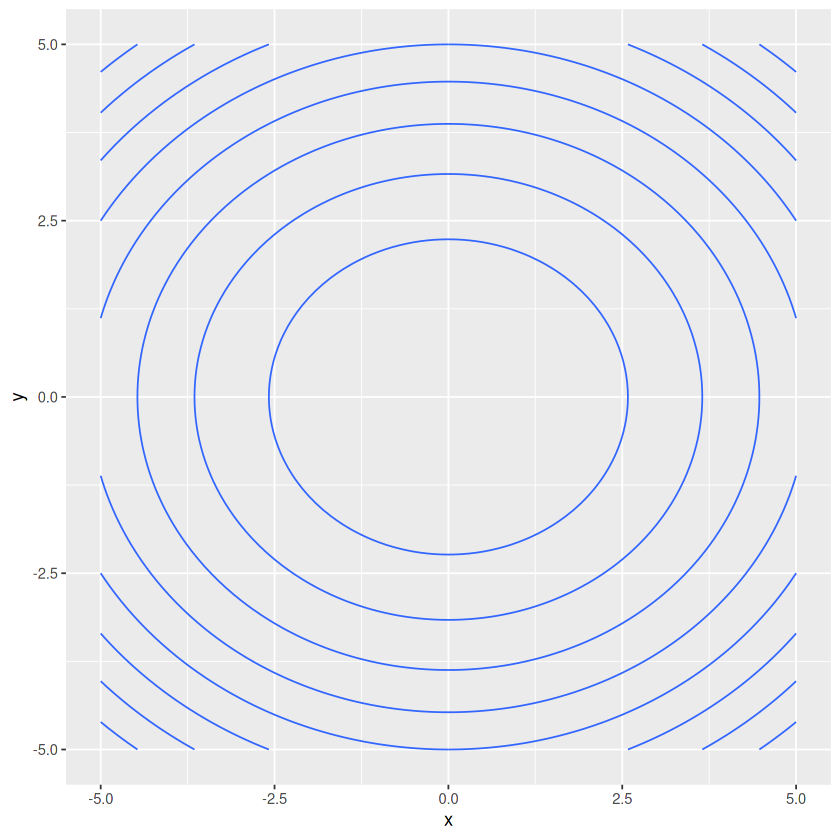

In [33]:
fun <- function(x, z){-3 * x^2 - 4 * z^2}

i <- seq(-5, 5, by = .1)
ii <- sort(rep(i, length(i)))
data <- data.frame(x = ii, y = i)
data$z <- fun(data$x, data$y)

plot <- ggplot(data, aes(x = x, y = y, z = z)) +
  geom_contour()
plot

Es wird eine 3D Funktion definiert, anschließend wird eine Tabelle aus (x, z)-Positionen generiert und dann für jedes Tupel ein z-Wert berechnet. Der Befehl `geom_contour` führt nun zu einer Darstellung der Höhenlinien.

Loading required package: viridisLite



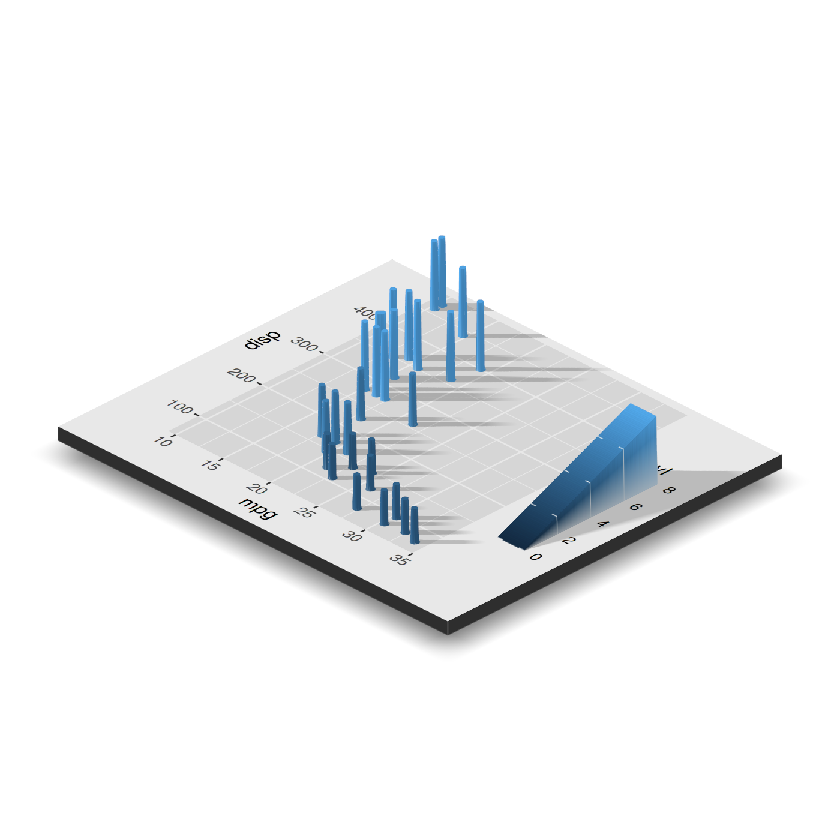

In [34]:
library(viridis)
library(rayshader)
mtplot = ggplot(mtcars) +
 geom_point(aes(x=mpg,y=disp,color=cyl)) +
 scale_color_continuous(limits=c(0,8))
plot_gg(mtplot, width=3.5, multicore = FALSE, windowsize = c(1400,866), sunangle=225,
       zoom = 0.60, phi = 30, theta = 45)
render_snapshot(clear = TRUE)

## annotate()

Man kann Plots zusätzlich um Grafik- bzw. Textelemente erweitern mit der Funktion `annotate`.

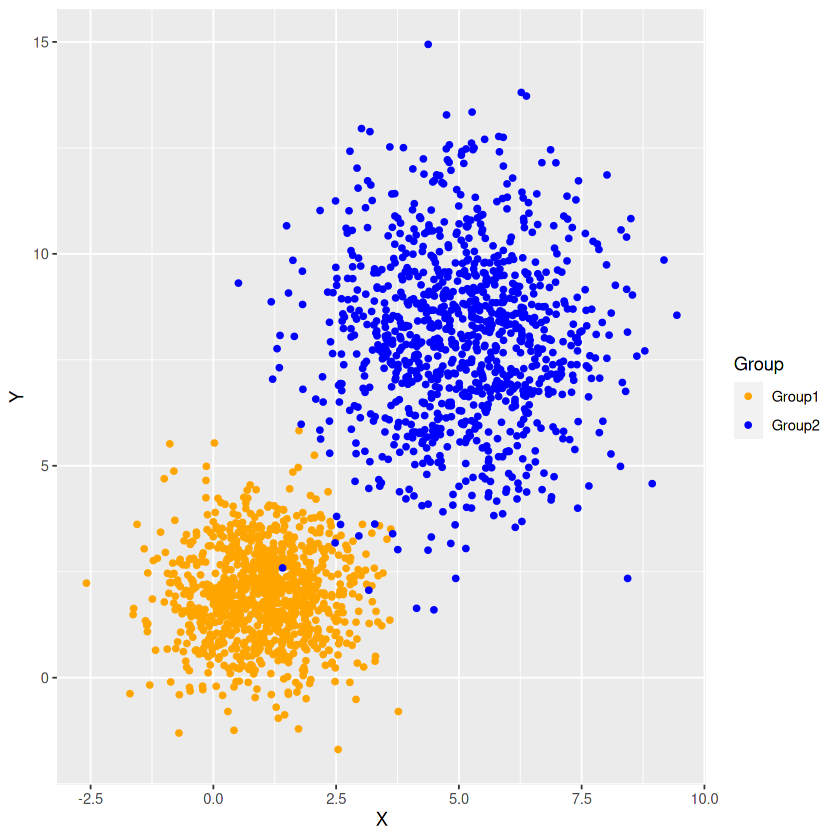

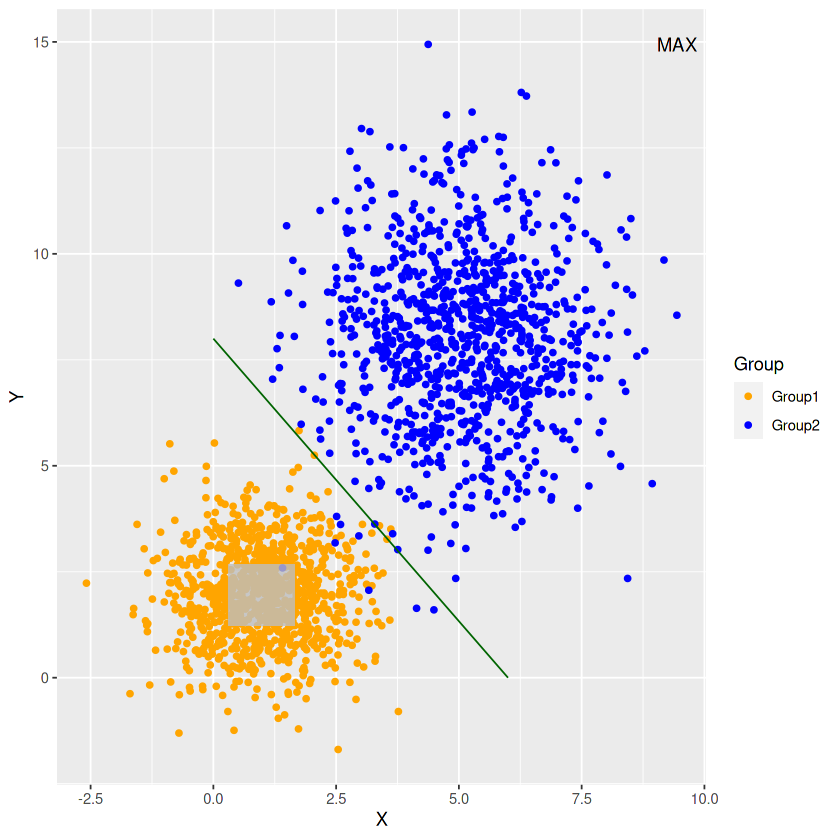

In [35]:
n <- 1000
sigma1 <- matrix(c(1, 0, 0, 1.2), byrow = TRUE, nrow = 2)
sigma2 <- matrix(c(2, 0, 0, 4), byrow = TRUE, nrow = 2)
u1 <- mvrnorm(n = n, mu <- c(1, 2), Sigma = sigma1)
u2 <-  mvrnorm(n = n, mu <- c(5, 8), Sigma = sigma2)


data <- data.frame(rbind(cbind("Group1", u1), cbind("Group2", u2)))
names(data) <- c("Group", "X", "Y")
data$Group %<>% factor
data$X %<>% as.numeric
data$Y %<>% as.numeric

plot <- ggplot(data = data) +
  geom_point(aes(x = X, y = Y, colour = Group)) +
  scale_color_manual(values = c("Group1" = "orange", "Group2" = "blue"))
plot

plot +
  annotate("Text", x = max(data$X), y = max(data$Y), label = "MAX") +
  annotate("Segment", x = 6, xend = 0, y = 0, yend = 8, color = "darkgreen") +
  annotate("rect", xmin = quantile(data$X[data$Group == "Group1"], 0.25), 
                  xmax = quantile(data$X[data$Group == "Group1"], 0.75),
                  ymin = quantile(data$Y[data$Group == "Group1"], 0.25),
                  ymax = quantile(data$Y[data$Group == "Group1"], 0.75), fill = "grey", alpha = 0.8)

### autoplot()

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Registered S3 methods overwritten by 'forecast':
  method                 from     
  autoplot.Arima         ggfortify
  autoplot.acf           ggfortify
  autoplot.ar            ggfortify
  autoplot.bats          ggfortify
  autoplot.decomposed.ts ggfortify
  autoplot.ets           ggfortify
  autoplot.forecast      ggfortify
  autoplot.stl           ggfortify
  autoplot.ts            ggfortify
  fitted.ar              ggfortify
  fortify.ts             ggfortify
  residuals.ar           ggfortify



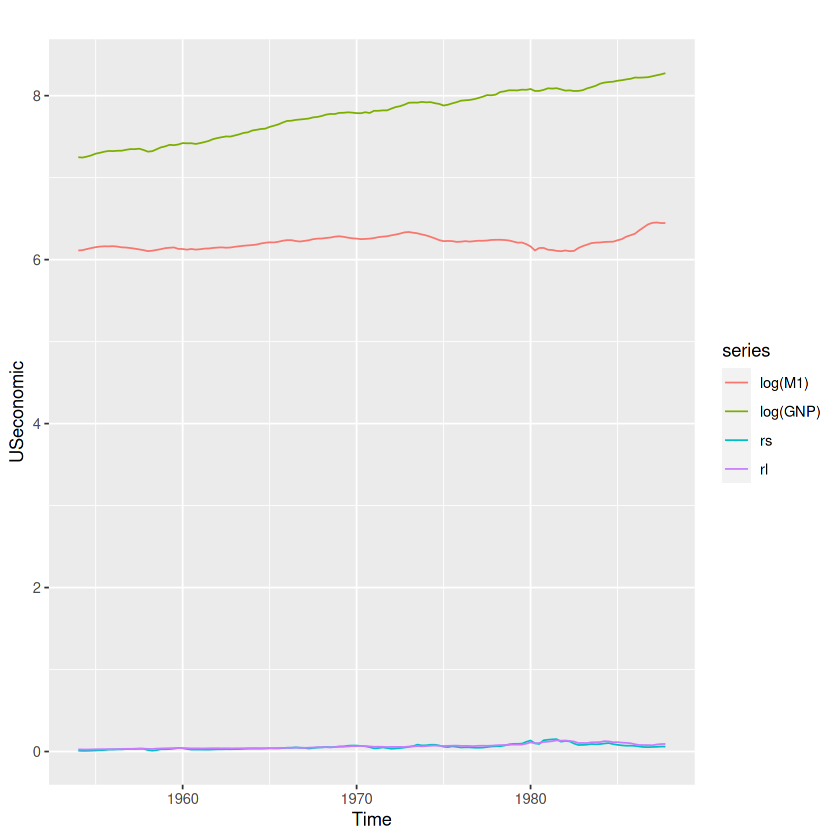

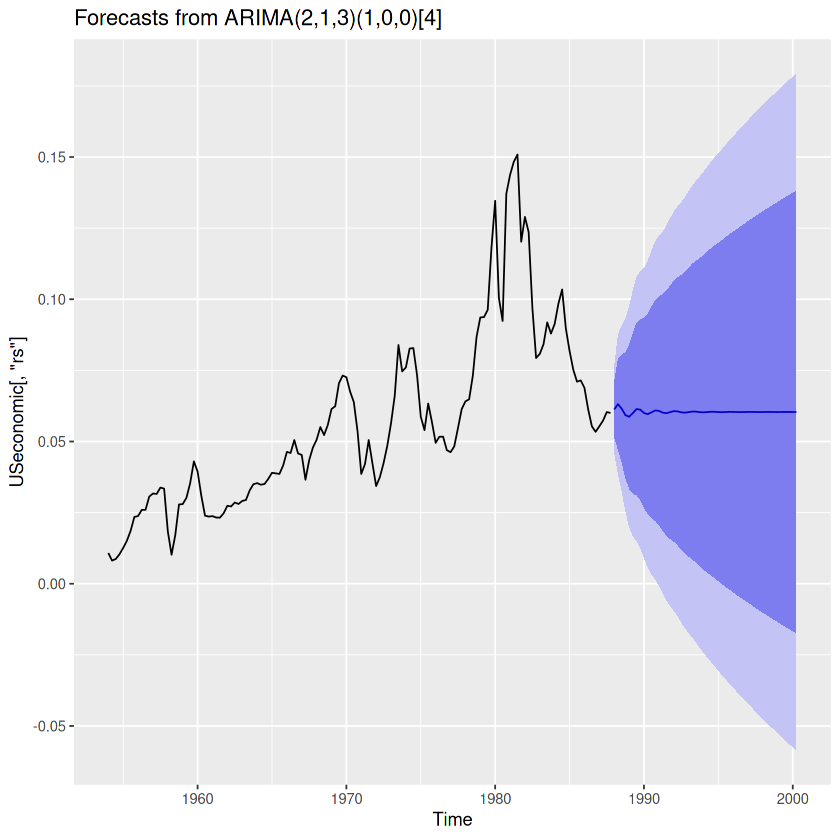

In [36]:
library(tseries)
library(ggfortify)
library(forecast)
data("USeconomic", package = "tseries")

autoplot(USeconomic)

model.arima <- auto.arima(USeconomic[, "rs"])

forecast.arima <- forecast(model.arima, h = 50)

autoplot(forecast.arima)

## stats

Die stats-Befehle erlauben das automatische Berechnen von einfachen Statistiken während dem Plotvorgang.

## Beispiele

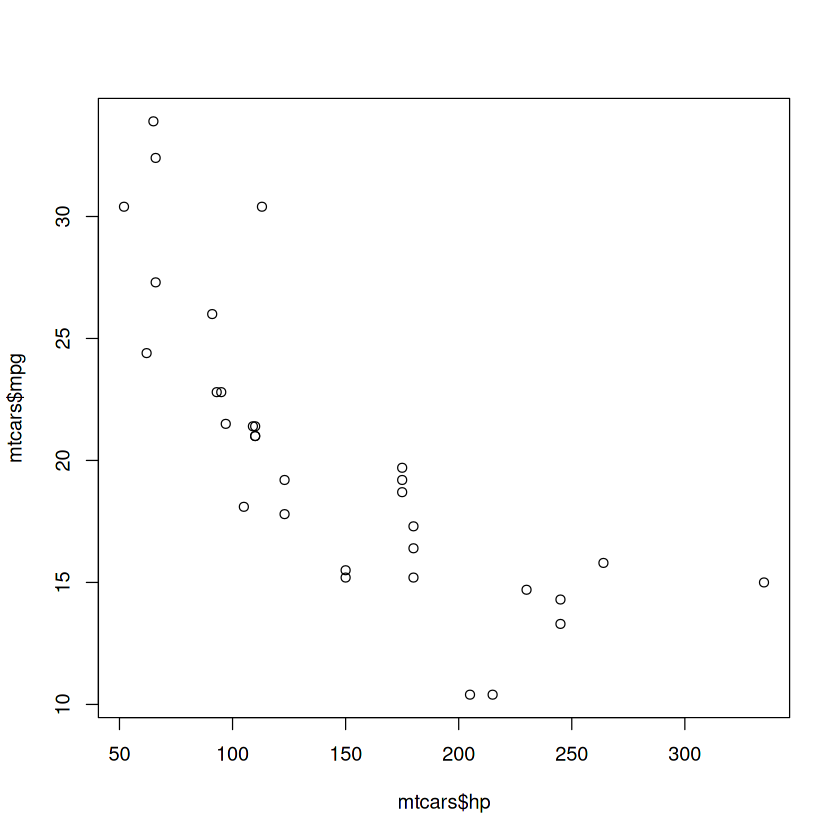

In [37]:
library(ggplot2)
library(car)
data("mtcars")
plot(x = mtcars$hp, y = mtcars$mpg)